# Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

 - CUST_ID : Identificazione del titolare della carta di credito (Categorico)
 - BALANCE : importo del saldo rimasto sul conto per effettuare acquisti
 - BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
 - PURCHASES : Quantità di acquisti effettuati dal conto
 - ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione
 - INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate
 - CASH_ADVANCE : Anticipo in contanti dato dall'utente
 - PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - ONEOFFPURCHASESFREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - PURCHASESINSTALLMENTSFREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).
 - CASHADVANCEFREQUENCY : frequenza con cui viene pagato l'anticipo in contanti
 - CASHADVANCETRX : Numero di transazioni effettuate con "contanti in anticipo".
 - PURCHASES_TRX : Numero di transazioni di acquisto effettuate
 - CREDIT_LIMIT : Limite della carta di credito dell'utente
 - PAYMENTS  : Importo dei pagamenti effettuati dall'utente
 - MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente
 - PRCFULLPAYMENT : Percentuale del pagamento completo pagato dall'utente
 - TENURE : Durata del servizio di carta di credito per l'utente

 Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv)

## Soluzione

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"

In [3]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:

credit_limit_mean = df['CREDIT_LIMIT'].mean()

df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)

minimum_payments_mean = df['MINIMUM_PAYMENTS'].mean()

df['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

In [6]:
df.shape

(8950, 18)

In [7]:
df_norm = df.copy()

features = df_norm.columns[1:]
df_norm[features] = (df_norm[features] - df_norm[features].min()) / (df_norm[features].max() - df_norm[features].min())
df_norm.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


In [8]:
RANDOM = 1
def plot_ssd_curve(data, max_clusters=10):

    ssd = {}

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=RANDOM, n_init='auto')
        kmeans.fit(data)
        ssd[k] = kmeans.inertia_

    plt.figure(figsize=(6, 3))
    plt.plot(list(ssd.keys()), list(ssd.values()), marker='o', linestyle='-')
    plt.title('Curva della SSD per la scelta del numero di cluster')
    plt.xlabel('Numero di Cluster')
    plt.ylabel('Somma dei Quadrati delle Distanze')
    plt.grid(True)
    plt.show()

def plot_cluster(model, data, axlabels=None):

    centers = model.cluster_centers_
    y_kmeans = model.predict(data)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_kmeans, palette='viridis', s=100)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Centroids')

    if axlabels is not None:
        plt.xlabel(axlabels[0], fontsize=12)
        plt.ylabel(axlabels[1], fontsize=12)

    plt.title('Scatter Plot dei Cluster', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
import pandas as pd

def to_cluster_dataframe(model, data, index_column='Customer ID', cluster_column='Cluster'):

    cluster_labels = model.predict(data)

    df_result = pd.DataFrame({index_column: data.index, cluster_column: cluster_labels})

    return df_result


Individuazione cluster per le seguenti features: "BALANCE" e "PURCHASE"

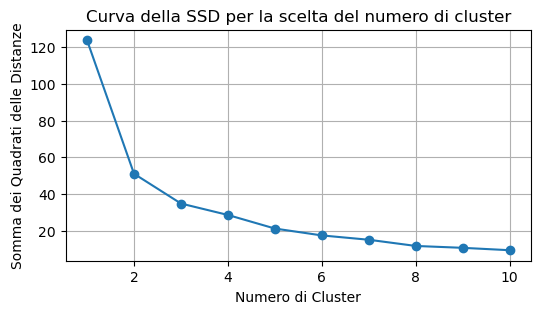

In [10]:
X = df_norm[['BALANCE', 'PURCHASES']].values
plot_ssd_curve(X)

In [11]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=RANDOM,n_init=10)
kmeans.fit(X)
kmeans.inertia_

17.314147469794673

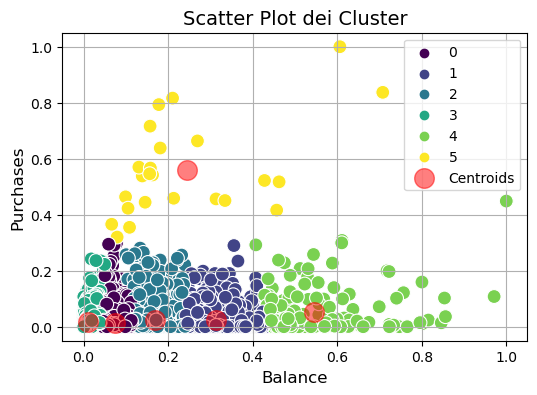

In [12]:
plot_cluster(kmeans, X, axlabels=['Balance', 'Purchases'])

In questo caso, i cluster 3 e 1 potrebbero essere considerati i piu' equilibrati, Il cluster 4 è un cluster con un alto numero di acquisti e un saldo ragionevole, quindi con potenzialità di spesa. Con una giusta strategia potrebbero essere invogliati ad effettuare piu' acquisti dato l'alto balance.

Individuazione cluster per seguenti features: "CREDIT_LIMIT" e "PAYMENTS"

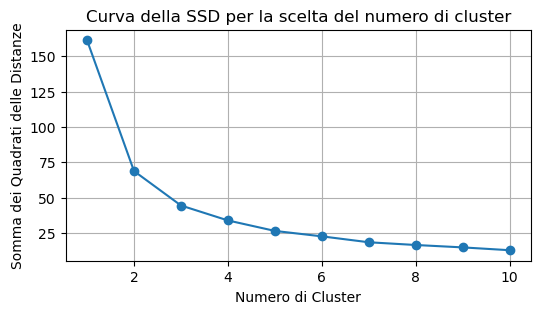

In [13]:
X = df_norm[['CREDIT_LIMIT', 'PAYMENTS']].values
plot_ssd_curve(X)

In [14]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=RANDOM,n_init=10)
kmeans.fit(X)
kmeans.inertia_

22.372311039387792

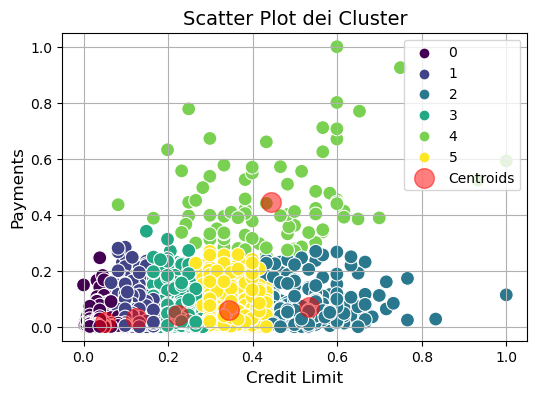

In [15]:
plot_cluster(kmeans, X, axlabels=['Credit Limit', 'Payments'])

In questo grafico vediamo come gli appartenenti al cluster 4 in quanto avente limite alto tendono a spendre molto di piu', con una buona strategia, potrebbe essere un buon target a cui proporre la linea di carte di credito con facilità, per gli altri cluster servirebberro strategie mirate all'incentivo dell'uso del suddetto pagamento elettronico.

Individuazione cluster per seguenti features: "PURCHASES_FREQUENCY" e "MINIMUM_PAYMENTS"


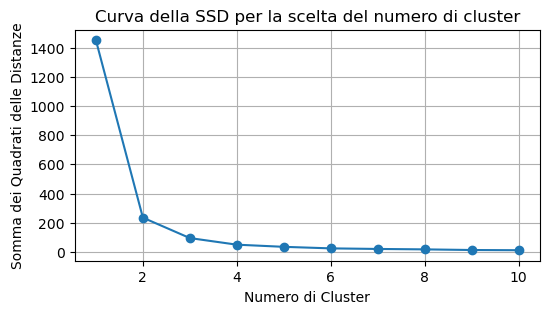

In [16]:
X = df_norm[['PURCHASES_FREQUENCY', 'MINIMUM_PAYMENTS']].values
plot_ssd_curve(X)

In [17]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=RANDOM,n_init=10)
kmeans.fit(X)
kmeans.inertia_

50.325613039127155

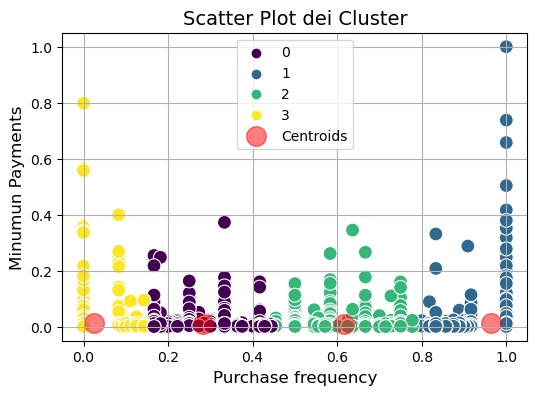

In [18]:
plot_cluster(kmeans, X, axlabels=['Purchase frequency', 'Minumun Payments'])

Dal grafico possiamo dedure che i clienti del cluster 2 e del cluster 0 sono quelli che utilizzano maggiormente le carte di credito e tendono a pagare una buona percentuale o tutta del loro debito. Per gli altri cluster dovrebbero essere creati degli incentivi per modificare le loro abitudini, e essere portati all'utilizzo delle carte credito.